In [26]:
import geofunk
import sonegeometri
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [54]:
tan_ro = 0.6
r = 0.3
nq, ngamma = geofunk.n_fakt(tan_ro, r)

print(nq, ngamma)

14.257921113735378 13.061371435761304


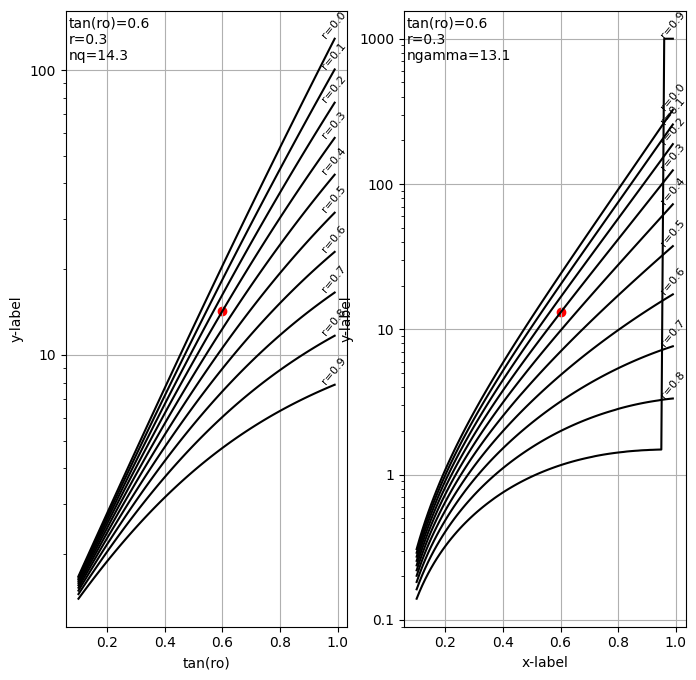

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[8,8])
r_liste = [x/100 for x in range(0, 100, 10)]
tan_fi_d = [x/100 for x in range(10, 100, 1)]
ax1.scatter(tan_ro, nq, color="red")
ax2.scatter(tan_ro, ngamma, color="red")
for r_ in r_liste:
    nqliste = []
    ngammaliste = []
    for d in tan_fi_d:
        nq_i, ngamma_i = geofunk.n_fakt(d, r_)
        nqliste.append(nq_i)
        if r_ < 0.9:
            ngammaliste.append(ngamma_i)
    ax1.plot(tan_fi_d, nqliste, color="black")
    ax2.plot(tan_fi_d, ngammaliste, color="black")
    ax1.annotate(f'r={r_}', xy=(max(tan_fi_d)-0.05,max(nqliste)), size=8, rotation=50)
    ax2.annotate(f'r={r_}', xy=(max(tan_fi_d)-0.05,max(ngammaliste)), size=8, rotation=50)
ax1.set_yscale("log")
ax2.set_yscale("log")
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax1.xaxis.grid()
ax2.xaxis.grid()
ax1.yaxis.grid()
ax2.yaxis.grid()
ax1.text(.01, 0.99, f"tan(ro)={tan_ro}\nr={r}\nnq={round(nq,1)}", ha="left", va="top", transform=ax1.transAxes)
ax2.text(.01, 0.99, f"tan(ro)={tan_ro}\nr={r}\nngamma={round(ngamma,1)}", ha="left", va="top", transform=ax2.transAxes)
ax1.set(xlabel='tan(ro)', ylabel='y-label')
ax2.set(xlabel='x-label', ylabel='y-label')

plt.show()
